# Kaggle Titanic #2

## 라이브러리 불러오기

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 모델 학습 관련
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
train_df = pd.read_csv("./data/train_df.csv", )
test_df = pd.read_csv("./data/test_df.csv")
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,female,male,embarked_C,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [18]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  pclass_1    891 non-null    int64  
 12  pclass_2    891 non-null    int64  
 13  pclass_3    891 non-null    int64  
 14  female      891 non-null    int64  
 15  male        891 non-null    int64  
 16  embarked_C  891 non-null    int64  
 17  embarked_Q  891 non-null    int64  
 18  embarked_S  891 non-null    int64  
dtypes: float64(2), int64(12), obj

(None, None)

-------

## 데이터 확인

In [19]:
#describe 옵션="O"
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rogers, Mr. William John",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## 탐색적 데이터 분석 (EDA)

### features를 pivot 후 분석

In [20]:
# ['Pclass', 'Survived'] 를 "Pclass"의 평균값(백분율)으로 groupby
# sort_values 함수를 사용하여 "Survived" 기준으로 오름차순 / 옵션 : by="Survived", ascending=False

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
# ['Sex', 'Survived'] 를 "Sex"의 평균값(백분율)으로 groupby
# sort_values 함수를 사용하여 "Survived" 기준으로 오름차순 / 옵션 : by="Survived", ascending=False


train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
# ['SibSp', 'Survived'] 를 "SibSp"의 평균값(백분율)으로 groupby
# sort_values 함수를 사용하여 "Survived" 기준으로 오름차순 / 옵션 : by="Survived", ascending=False


train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
# ['Parch', 'Survived'] 를 "Parch"의 평균값(백분율)으로 groupby
# sort_values 함수를 사용하여 "Survived" 기준으로 오름차순 / 옵션 : by="Survived", ascending=False

train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 시각화 후 분석

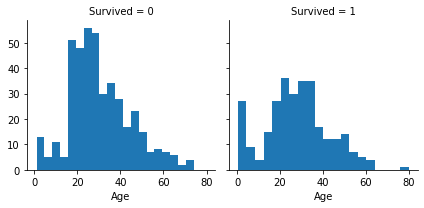

In [24]:
# Observations.

# Infants (Age <=4) had high survival rate.
# Oldest passengers (Age = 80) survived.
# Large number of 15-25 year olds did not survive.
# Most passengers are in 15-35 age range.

# Decisions.

# This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

# We should consider Age (our assumption classifying #2) in our model training.
# Complete the Age feature for null values (completing #1).
# We should band age groups (creating #3).

# sns.FacetGrid에 train_df를 입력하고, col="Survived" 옵션 지정
# map함수를 이용하여 나이에 따른 생존자 수 히스토그램 그리기 / bins=20 옵션 지정

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

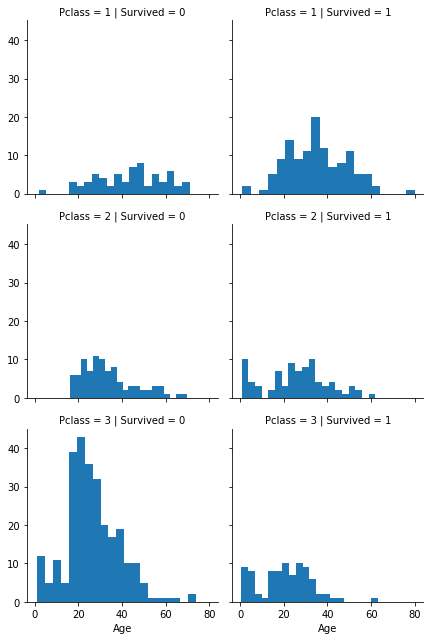

In [25]:
# Observations.

# Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
# Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
# Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
# Pclass varies in terms of Age distribution of passengers.

# Decisions.

# Consider Pclass for model training.

# sns.FacetGrid에 train_df를 입력하고, col="Survived", row="Pclass" 옵션 지정
# map함수를 이용하여 나이에 따른 Pclass 별 생존자 수 히스토그램 그리기 / bins=20 옵션 지정

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


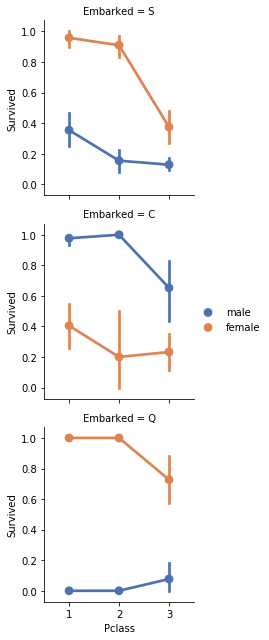

In [26]:
# Observations.

# Female passengers had much better survival rate than males. Confirms classifying (#1).
# Exception in Embarked=C where males had higher survival rate. 
# This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, 
# not necessarily direct correlation between Embarked and Survived.

# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

# Decisions.

# Add Sex feature to model training.
# Complete and add Embarked feature to model training.


# sns.FacetGrid에 train_df를 입력하고, row="Embarked" 옵션 지정
# map함수를 이용하여 성별에 따른 Pclass 별 생존자 수 pointplot 그리기 / palette='deep'옵션 지정

grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


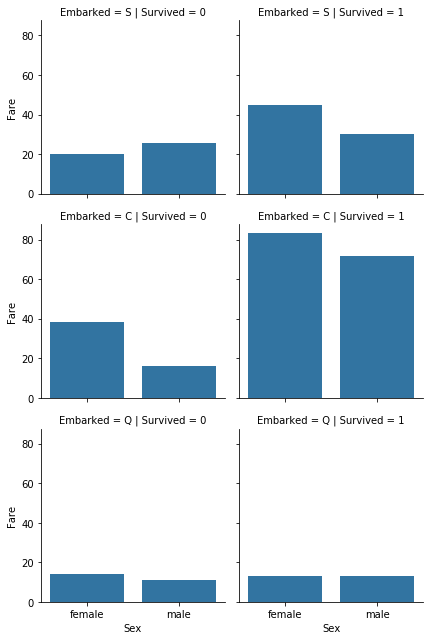

In [27]:
# Observations.

# Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
# Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

# Decisions.

# Consider banding Fare feature.


# sns.FacetGrid에 train_df를 입력하고, row="Embarked" , col="Survived" 옵션 지정
# map함수를 이용하여 성별에 따른 Fare barplot 그리기

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

------------

## 데이터 전처리

### 사용하지 않는 columns drop

In [28]:
train_df = train_df.drop(['Pclass', 'Embarked', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Pclass', 'Embarked', 'Ticket', 'Cabin'], axis=1)

### Name을 활용하여 새로운 feature 생성

In [29]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
def replace_title(df):
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    
# replace_title 함수를 train_df, test_df 에 파이핑하여 타이틀 변경
train_df.pipe(replace_title)
test_df.pipe(replace_title)

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [31]:
train_df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,female,male,embarked_C,embarked_Q,embarked_S,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,Mrs
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,Mrs
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,Mr


In [32]:
# mapping 함수 만들기
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 를 활용하여
# "Title" 컬럼에 map 함수 사용하여 매핑 / nan 값은 0으로 fillna

def mapping(df):
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

train_df.pipe(mapping)
test_df.pipe(mapping)

train_df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,female,male,embarked_C,embarked_Q,embarked_S,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,3
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,3
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1


In [33]:
train_df = train_df.drop(['Name', 'Sex'], axis=1)
test_df = test_df.drop(['Name', 'Sex'], axis=1)

print(train_df.shape, test_df.shape)
train_df.head()

(891, 14) (418, 14)


,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,female,male,embarked_C,embarked_Q,embarked_S,Title
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,3
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,2
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,3
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1


### fillna

In [35]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

In [36]:
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)
test_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

In [37]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   pclass_1    891 non-null    int64  
 6   pclass_2    891 non-null    int64  
 7   pclass_3    891 non-null    int64  
 8   female      891 non-null    int64  
 9   male        891 non-null    int64  
 10  embarked_C  891 non-null    int64  
 11  embarked_Q  891 non-null    int64  
 12  embarked_S  891 non-null    int64  
 13  Title       891 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----- 

(None, None)

### SibSp와 Parch 를 활용하여 Feature 생성

In [41]:
# SibSp + Parch + 1 -> 나를 포함한 Famliy size 함수 만들기
def get_famliy_size(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# train, test 데이터 프레임 각각에 get_famliy_size 함수 파이핑
train_df.pipe(get_famliy_size)
test_df.pipe(get_famliy_size)

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [44]:
# 데이터 프레임의 IsAlone 컬럼을 0으로 초기화 후, FamilySize 컬럼의 값이 1인 IsAlone 값을 1로 지정하는 함수 만들기
def is_alone(df):
    df['IsAlone'] = 0
    df.loc[df["FamilySize"]==1, "IsAlone"] = 1

train_df.pipe(is_alone)
test_df.pipe(is_alone)

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [45]:
train_df = train_df.drop(['FamilySize'], axis=1)
test_df = test_df.drop(['FamilySize'], axis=1)

train_df.head()

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,female,male,embarked_C,embarked_Q,embarked_S,Title,IsAlone
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,3,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,2,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,3,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,1


## 모델 학습

### 데이터 분할

In [46]:
train_x = train_df.drop("Survived", axis=1)
train_y = train_df["Survived"]
test_x = test_df.drop("PassengerId", axis=1)

train_x.shape, train_y.shape, test_x.shape

((891, 14), (891,), (418, 14))

### 학습 데이터, 검증 데이터 분할

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(623, 14) (268, 14) (623,) (268,)


### 모델 생성 및 학습

In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/yehoon/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### 모델 성능 검증

In [52]:
y_val_pred = lr.predict(X_valid)
accuracy_score(y_valid, y_val_pred)

0.7985074626865671

#### 테스트 데이터 예측

In [53]:
y_predict = lr.predict(test_x)

### 제출용 파일 만들기

In [54]:
titanic_sub = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived":y_predict})
titanic_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
titanic_sub.to_csv("./submission/titanic_2.csv", index=False)